In [59]:
from fredapi import Fred
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

In [31]:
import plotly.express as px

## Using Fred Api to fetch data

In [32]:
fred_key = 'dd9413f500903a81298459e16cd90e31'
fred = Fred(api_key=fred_key)
snp_search = fred.search('S&P', order_by='popularity')
snp_search.head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
BAMLH0A0HYM2,BAMLH0A0HYM2,2023-02-28,2023-02-28,ICE BofA US High Yield Index Option-Adjusted S...,1996-12-31,2023-02-27,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2023-02-28 08:48:08-06:00,94,The ICE BofA Option-Adjusted Spreads (OASs) ar...
CSUSHPINSA,CSUSHPINSA,2023-02-28,2023-02-28,S&P/Case-Shiller U.S. National Home Price Index,1987-01-01,2022-12-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Not Seasonally Adjusted,NSA,2023-02-28 08:02:02-06:00,91,"For more information regarding the index, plea..."
BAMLH0A0HYM2EY,BAMLH0A0HYM2EY,2023-02-28,2023-02-28,ICE BofA US High Yield Index Effective Yield,1996-12-31,2023-02-27,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2023-02-28 08:48:12-06:00,84,This data represents the effective yield of th...
SP500,SP500,2023-02-28,2023-02-28,S&P 500,2013-02-28,2023-02-27,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2023-02-27 19:10:56-06:00,84,The observations for the S&P 500 represent the...
CSUSHPISA,CSUSHPISA,2023-02-28,2023-02-28,S&P/Case-Shiller U.S. National Home Price Index,1987-01-01,2022-12-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Seasonally Adjusted,SA,2023-02-28 08:02:04-06:00,82,"For more information regarding the index, plea..."


### Pull Raw Data

<Axes: title={'center': 'S&P500'}>

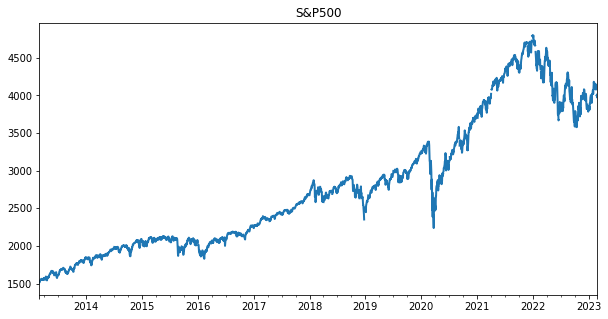

In [33]:
sp500 = fred.get_series(series_id='SP500')
sp500.plot(figsize=(10,5), title='S&P500' , lw=2)

### Pull and Join Multiple Data Sets

In [34]:
uemp_results = fred.search('unemployment')
uemp_results.head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2023-02-28,2023-02-28,Unemployment Rate,1948-01-01,2023-01-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-02-03 07:44:02-06:00,94,The unemployment rate represents the number of...
UNRATENSA,UNRATENSA,2023-02-28,2023-02-28,Unemployment Rate,1948-01-01,2023-01-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2023-02-03 07:43:02-06:00,58,The unemployment rate represents the number of...
NROU,NROU,2023-02-28,2023-02-28,Noncyclical Rate of Unemployment,1949-01-01,2032-10-01,Quarterly,Q,Percent,%,Not Seasonally Adjusted,NSA,2022-05-26 13:45:04-05:00,71,"Starting with the July, 2021 report: An Update..."
UNEMPLOY,UNEMPLOY,2023-02-28,2023-02-28,Unemployment Level,1948-01-01,2023-01-01,Monthly,M,Thousands of Persons,Thous. of Persons,Seasonally Adjusted,SA,2023-02-03 07:44:05-06:00,70,The series comes from the 'Current Population ...
CCSA,CCSA,2023-02-28,2023-02-28,Continued Claims (Insured Unemployment),1967-01-07,2023-02-11,"Weekly, Ending Saturday",W,Number,Number,Seasonally Adjusted,SA,2023-02-23 07:33:14-06:00,72,"Continued claims, also referred to as insured ..."


<Axes: >

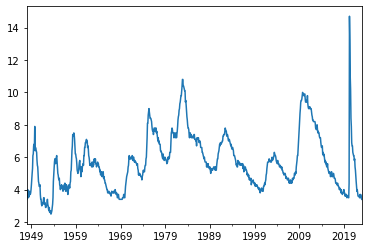

In [35]:
unrate = fred.get_series('UNRATE')
unrate.plot()

In [36]:
uemp_df = fred.search('unemployment state', filter=('frequency', 'Monthly'))
uemp_df = uemp_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')
uemp_df.head()


,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2023-02-28,2023-02-28,Unemployment Rate,1948-01-01,2023-01-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-02-03 07:44:02-06:00,94,The unemployment rate represents the number of...
U6RATE,U6RATE,2023-02-28,2023-02-28,"Total Unemployed, Plus All Persons Marginally ...",1994-01-01,2023-01-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-02-03 07:44:13-06:00,67,The series comes from the 'Current Population ...
LNS14000006,LNS14000006,2023-02-28,2023-02-28,Unemployment Rate - Black or African American,1972-01-01,2023-01-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-02-03 07:44:12-06:00,66,The series comes from the 'Current Population ...
M0892AUSM156SNBR,M0892AUSM156SNBR,2023-02-28,2023-02-28,Unemployment Rate for United States,1929-04-01,1942-06-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2012-08-17 14:26:06-05:00,56,Series Is Presented Here As Three Variables--(...
CAUR,CAUR,2023-02-28,2023-02-28,Unemployment Rate in California,1976-01-01,2022-12-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-01-25 08:27:02-06:00,57,None


In [37]:
uemp_df = uemp_df.loc[uemp_df['title'].str.contains('Unemployment Rate')]
uemp_df.index

Index(['UNRATE', 'LNS14000006', 'M0892AUSM156SNBR', 'CAUR', 'M0892BUSM156SNBR',
       'FLUR', 'TXUR', 'LNS14000024', 'LNS14000031', 'NYUR', 'U2RATE',
       'LNS14000002', 'PAUR', 'LNS14000001', 'LNS14000009', 'LNS14027662',
       'LNS14000003', 'ALUR', 'MIUR', 'OHUR', 'LNS14027660', 'NCUR', 'ILUR',
       'KYUR', 'LRUN64TTUSM156S', 'GAUR', 'WIUR', 'COUR', 'VAUR',
       'LNS14032183', 'MNUR', 'NJUR', 'AKUR', 'MOUR', 'TNUR', 'SCUR', 'NMUR',
       'WAUR', 'ARUR', 'IAUR', 'INUR', 'MAUR', 'AZUR', 'NVUR', 'LNS14027659',
       'LNS14000012', 'WVUR', 'UTUR', 'NDUR', 'ORUR', 'OKUR', 'LAUR', 'MDUR',
       'LASMT261982000000003', 'HIUR', 'SDUR', 'MTUR', 'LNS14000018', 'PRUR',
       'IDUR', 'NEUR', 'DCUR', 'MSUR', 'WYUR', 'CTUR', 'KSUR', 'NHUR', 'MEUR',
       'LNS14024887', 'LASMT391746000000003', 'LNS14000060', 'LNS14000061',
       'LNS14000036', 'LNS14000028', 'DEUR', 'VTUR', 'RIUR', 'LNS14000032',
       'LNS14024230', 'LNS14027689', 'LRHUTTTTUSM156S', 'LNS14000062',
       'LNS140000

### Creates list of df's for each dataset in uemp_df

In [38]:
all_results = []

for myid in uemp_df.index:
    results = fred.get_series(myid)
    results = results.to_frame(name=myid)
    all_results.append(results)

uemp_results = pd.concat(all_results, axis=1)


In [40]:
#drop id's that aernt states, seem to be all rows with id len > 5
uemp_results = uemp_results.drop(uemp_results.columns[uemp_results.columns.str.len()>=5], axis=1)
uemp_results = uemp_results.dropna()

In [41]:
id_to_state = uemp_df['title'].str.replace('Unemployment Rate in', '').to_dict()
uemp_results.columns = [id_to_state[col] for col in uemp_results.columns]

In [42]:
#Plot states unemployment rate

px.line(uemp_results)

## Pull May 2020 Unemployment Rate Per State

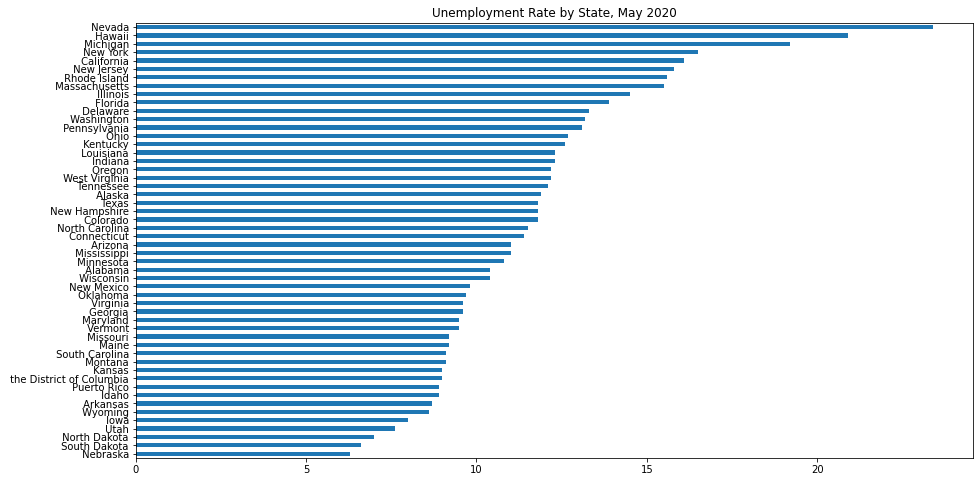

In [43]:
ax = uemp_results.loc[uemp_results.index == 'May 2020'].T \
    .sort_values('2020-05-01') \
        .plot(kind='barh', figsize=(15,8),
        title='Unemployment Rate by State, May 2020')

ax.legend().remove()
plt.show()

# want to make the label be the actual state name
#  note fixed this in [12]

## Let's pull and compare participation rates now

In [44]:
part_df = fred.search('participation state', filter=('frequency', 'Monthly'))
part_df = part_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')

In [45]:
part_df = part_df.loc[part_df['title'].str.contains('Labor Force Participation Rate')]
part_df.index

Index(['CIVPART', 'LNS11300002', 'LNS11300001', 'LNS11300060', 'LNS11324230',
       'LBSSA13', 'LBSSA06', 'LNS11300012', 'LBSSA01', 'LBSSA27', 'LBSSA12',
       'LBSSA55', 'LBSSA21', 'LBSSA53', 'LNS11300003', 'LBSSA39', 'LBSSA48',
       'LBSSA08', 'LNS11300036', 'LBSSA25', 'LBSSA26', 'LBSSA22', 'LBSSA49',
       'LBSSA19', 'LBSSA42', 'LBSSA15', 'LBSSA04', 'LBSSA18', 'LBSSA17',
       'LBSSA02', 'LBSSA24', 'LBSSA16', 'LBSSA23', 'LBSSA29', 'LBSSA32',
       'LBSSA40', 'LBSSA28', 'LBSSA20', 'LBSSA47', 'LBSSA05', 'LBSSA31',
       'LBSSA51', 'LBSSA41', 'LBSSA36', 'LBSSA56', 'LBSSA30', 'LBSSA50',
       'LBSSA35', 'LBSSA09', 'LNS11300006', 'LBSSA37', 'LBSSA10', 'LBSSA54',
       'LBSSA46', 'LBSSA45', 'LBSSA38', 'LNS11300009', 'LBSSA33', 'LBSSA34',
       'LBSSA44', 'LNS11300026', 'LBSSA11', 'LNS11300025', 'LNS11300028',
       'LNS11327662', 'LNS11300029', 'LNS11327660', 'LNS11300015',
       'LNS11300032', 'LNS11300031', 'LNS11327659', 'LNS11327689',
       'LNS11300018'],
      dtype='o

In [49]:
all_results = []

for myid in part_df.index:
    results = fred.get_series(myid)
    results = results.to_frame(name=myid)
    all_results.append(results)

part_results = pd.concat(all_results, axis=1)


In [50]:
part_results.columns

Index(['CIVPART', 'LNS11300002', 'LNS11300001', 'LNS11300060', 'LNS11324230',
       'LBSSA13', 'LBSSA06', 'LNS11300012', 'LBSSA01', 'LBSSA27', 'LBSSA12',
       'LBSSA55', 'LBSSA21', 'LBSSA53', 'LNS11300003', 'LBSSA39', 'LBSSA48',
       'LBSSA08', 'LNS11300036', 'LBSSA25', 'LBSSA26', 'LBSSA22', 'LBSSA49',
       'LBSSA19', 'LBSSA42', 'LBSSA15', 'LBSSA04', 'LBSSA18', 'LBSSA17',
       'LBSSA02', 'LBSSA24', 'LBSSA16', 'LBSSA23', 'LBSSA29', 'LBSSA32',
       'LBSSA40', 'LBSSA28', 'LBSSA20', 'LBSSA47', 'LBSSA05', 'LBSSA31',
       'LBSSA51', 'LBSSA41', 'LBSSA36', 'LBSSA56', 'LBSSA30', 'LBSSA50',
       'LBSSA35', 'LBSSA09', 'LNS11300006', 'LBSSA37', 'LBSSA10', 'LBSSA54',
       'LBSSA46', 'LBSSA45', 'LBSSA38', 'LNS11300009', 'LBSSA33', 'LBSSA34',
       'LBSSA44', 'LNS11300026', 'LBSSA11', 'LNS11300025', 'LNS11300028',
       'LNS11327662', 'LNS11300029', 'LNS11327660', 'LNS11300015',
       'LNS11300032', 'LNS11300031', 'LNS11327659', 'LNS11327689',
       'LNS11300018'],
      dtype='o

In [51]:
#drop id's that aernt states, seem to be all rows with id len > 8
part_results = part_results.drop(part_results.columns[part_results.columns.str.len()>=8], axis=1)
part_results = part_results.dropna()

In [52]:
part_results.head()

,CIVPART,LBSSA13,LBSSA06,LBSSA01,LBSSA27,LBSSA12,LBSSA55,LBSSA21,LBSSA53,LBSSA39,...,LBSSA37,LBSSA10,LBSSA54,LBSSA46,LBSSA45,LBSSA38,LBSSA33,LBSSA34,LBSSA44,LBSSA11
1976-01-01,61.3,63.7,62.6,57.0,65.6,55.8,65.6,60.5,60.9,61.7,...,66.5,62.7,52.5,64.6,65.3,62.6,65.9,61.5,63.8,64.4
1976-02-01,61.3,63.6,62.4,56.9,65.5,55.7,65.5,60.3,60.7,61.7,...,66.3,62.5,52.4,64.4,65.2,62.4,65.6,61.4,63.7,64.5
1976-03-01,61.3,63.5,62.2,56.8,65.4,55.5,65.4,60.2,60.6,61.7,...,66.2,62.5,52.3,64.4,65.0,62.3,65.6,61.4,63.6,64.5
1976-04-01,61.6,63.5,62.2,56.8,65.4,55.5,65.4,60.1,60.6,61.6,...,66.2,62.4,52.3,64.3,64.9,62.5,65.7,61.5,63.7,64.5
1976-05-01,61.5,63.6,62.3,56.8,65.5,55.4,65.5,60.1,60.7,61.6,...,66.3,62.4,52.2,64.3,64.7,62.6,66.0,61.6,63.6,64.4


In [53]:
id_to_state = part_df['title'].str.replace('Labor Force Participation Rate for', '').to_dict()
part_results.columns = [id_to_state[col] for col in part_results.columns]

## Plot Unemployment v Participation Rates

In [54]:
part_results[' New York']
uemp_results[' New York']

1976-01-01    10.3
1976-02-01    10.3
1976-03-01    10.2
1976-04-01    10.2
1976-05-01    10.1
              ... 
2022-04-01     4.5
2022-05-01     4.4
2022-06-01     4.4
2022-07-01     4.3
2022-08-01     4.7
Name:  New York, Length: 558, dtype: float64

### Comparing New York Rates

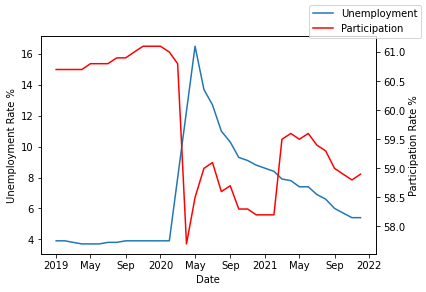

In [55]:
part_newyork = part_results.query('index >= 2019 and index < 2022')[' New York'] 
uemp_newyork = uemp_results.query('index >= 2019 and index < 2022')[' New York'] 

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.plot(uemp_newyork, label='Unemployment')
ax1.set_xlabel('Date')
ax1.set_ylabel('Unemployment Rate %')
ax1.xaxis.set_major_formatter(mdates.ConciseDateFormatter(ax1.xaxis.get_major_locator()))


ax2.plot(part_newyork, label='Participation', color = 'r')
ax2.set_ylabel('Participation Rate %')

fig.legend(loc='upper right')



### Ploting every state 'Participation v Unemployment'

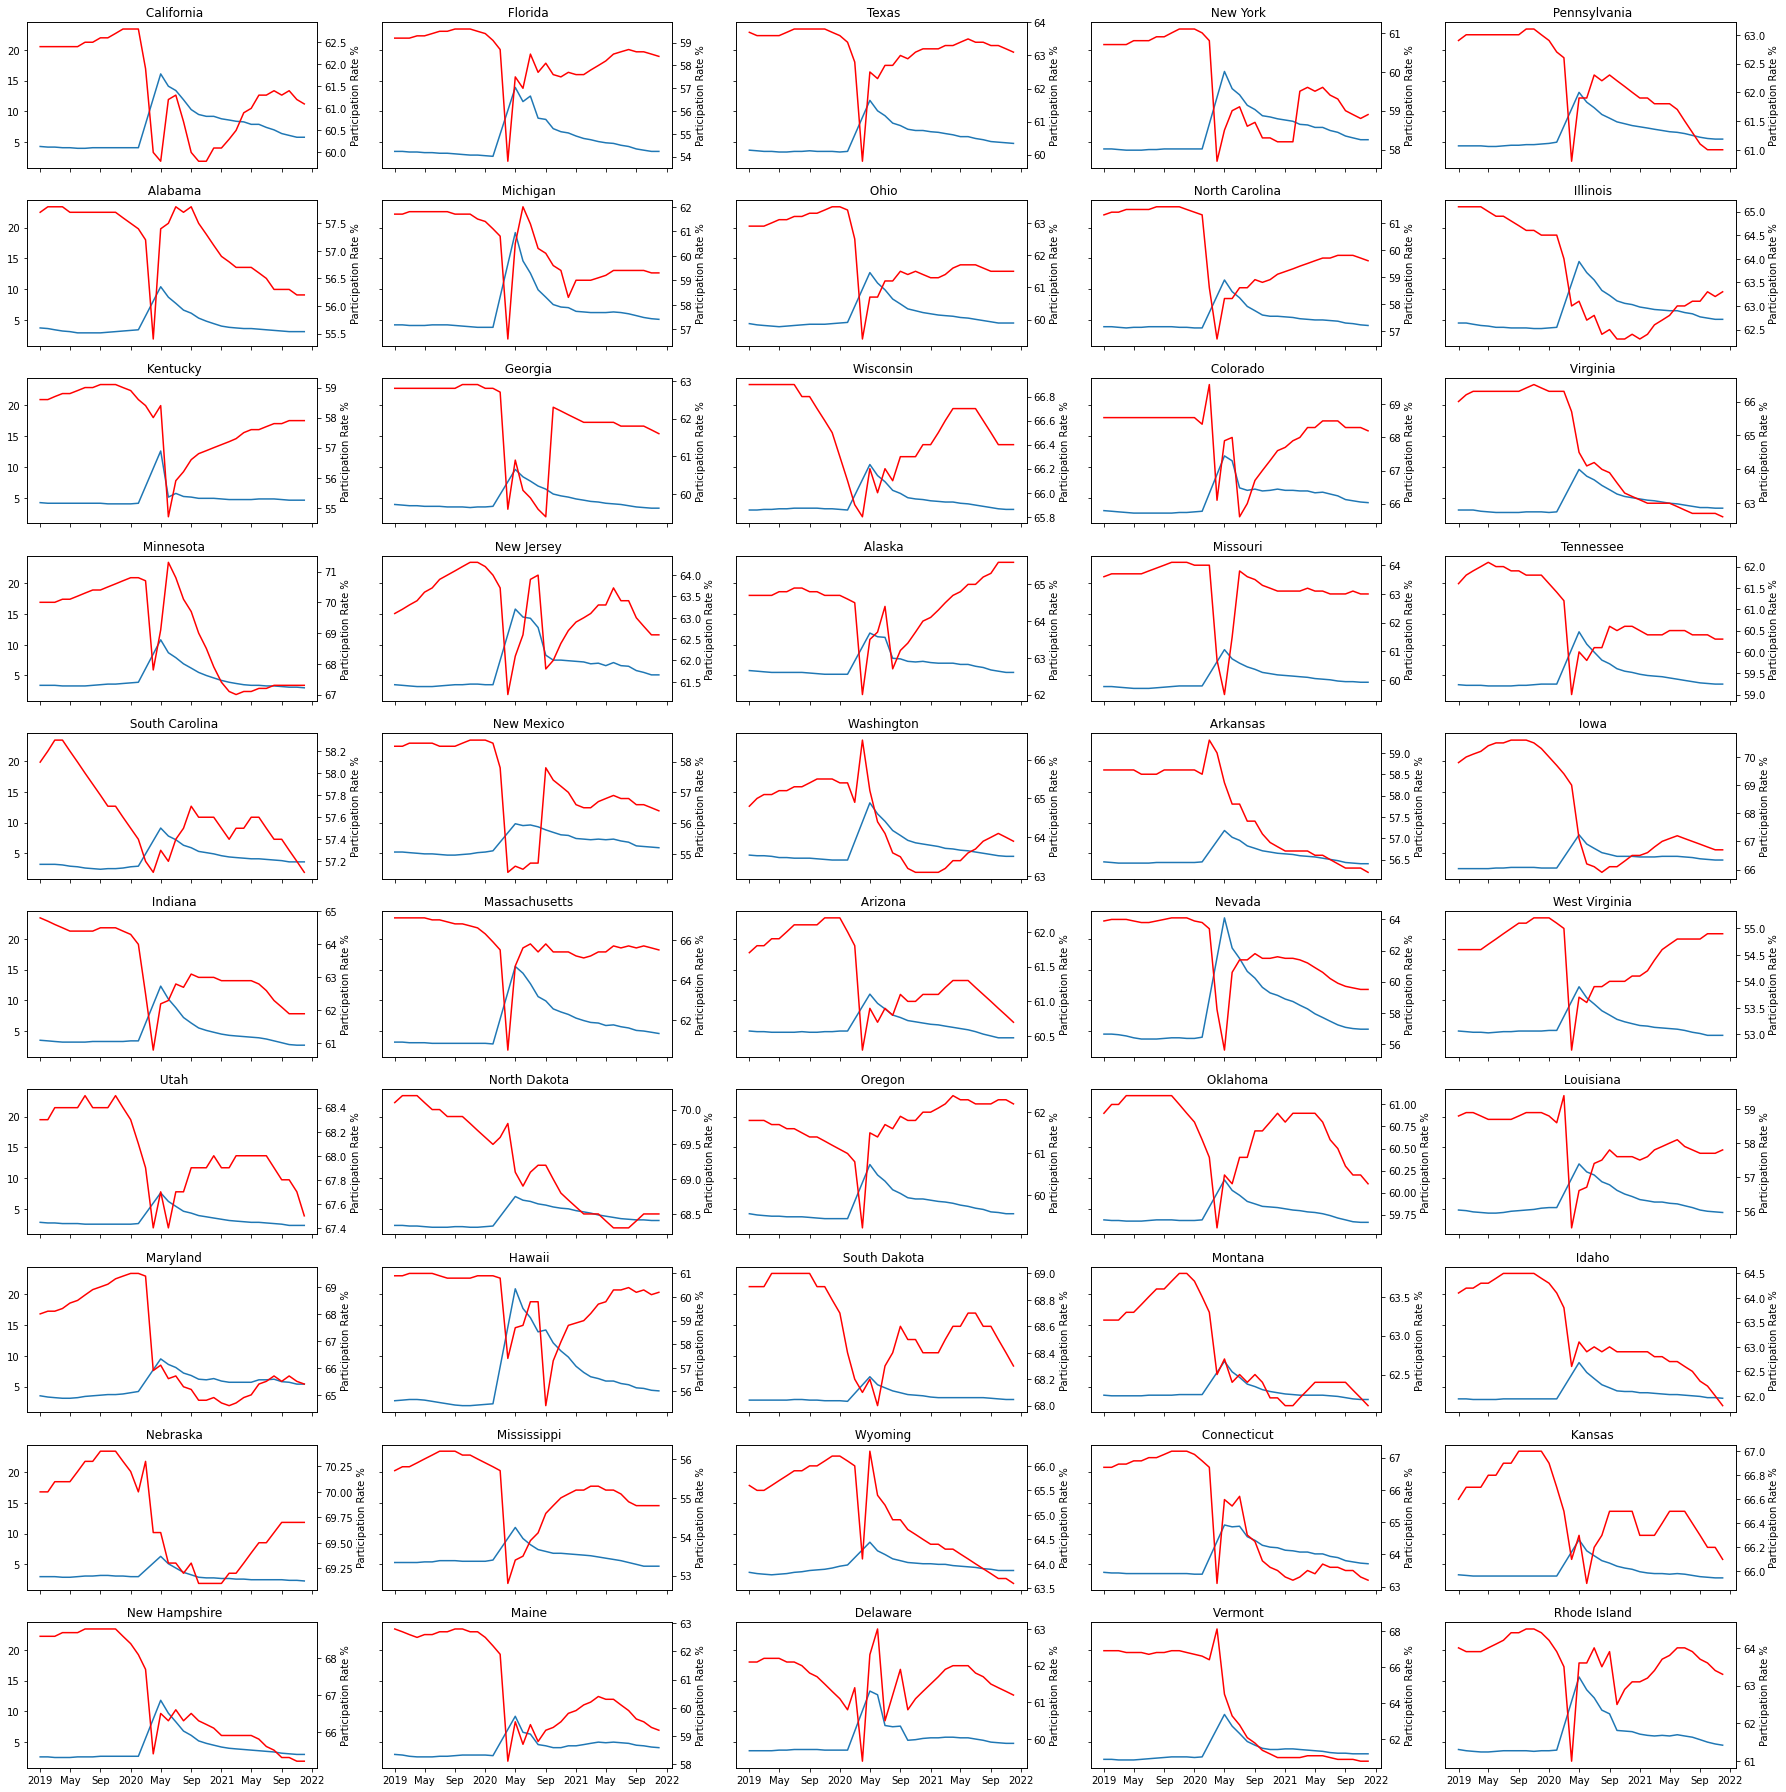

In [102]:

fig, axs = plt.subplots(10,5, figsize=(25,25), sharex= True, sharey=True)
axs = axs.flatten()

i = 0 
#array size is only 50 and below states don't match across dataframes so just going to skip.
for state in uemp_results.columns:
    if state == ' Puerto Rico' or state == ' the District of Columbia':
        continue
    ax2 = axs[i].twinx()
    uemp_all = uemp_results.query('index >= 2019 and index < 2022')[state]
    axs[i].plot(uemp_all, label='Unemployment')
    axs[i].xaxis.set_major_formatter(mdates.ConciseDateFormatter(ax1.xaxis.get_major_locator()))
    part_all = part_results.query('index >= 2019 and index < 2022')[state]
    ax2.plot(part_all, label='Participation', color = 'r')
    ax2.set_ylabel('Participation Rate %')
    axs[i].set_title(state)
    i += 1



plt.tight_layout()
plt.show()

### producing correlation statistics across the two dataframes

In [106]:

cor = uemp_results.corrwith(part_results).to_frame('correlation')
cor.sort_values(by=['correlation'])
###North Dakota has the highest -r , and most states indicate a neg correlation of some size but not as strong as you would expect.

,correlation
North Dakota,-0.627380
Pennsylvania,-0.601628
Iowa,-0.518007
West Virginia,-0.511659
Delaware,-0.488746
New York,-0.463603
Indiana,-0.402353
Washington,-0.390017
Utah,-0.380604
Massachusetts,-0.364871


In [1]:
cor.describe()


NameError: name 'cor' is not defined